In [1]:
'''Package imports'''
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import glob
import os
#import train_test_split

In [2]:
# plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'



In [3]:
'''Note: Insert the directory where .mat data exists'''
#os.chdir('C://Users//Ron//Desktop//ML_proj/Brain_cancer/data')
#os.chdri('') #Insert the data directory on your local machine
files=glob.glob('*.mat')

In [4]:
#files


In [5]:
# X=np.zeros((80,512,512))
# Y=np.zeros((80,1))

In [6]:
# count = 0
# for file in files:
#     with h5py.File(file,'r') as f:
#         variables=f.items()
#         #print(len(variables))
#         #print(type(variables))
#         for var in variables:
#             name= var[0]
#             data=var[1]
#             #print(name)
#             #print(np.array(data['tumorMask']))
#             #X.append(np.array(data['tumorMask']))
#             #Y.append(data['label'].value.flatten())
#         #print(np.array(data['tumorMask']).shape)
#         X[count] = np.array(data['tumorMask'])
#         Y[count] = np.array(data['label'])
#         count = count + 1

In [7]:
'''Initial data extraction from matlab dictionary'''
import cv2 
X=[]
Y=[]
Z=[]
count=0
#a = 1
for file in files:
    with h5py.File(file,'r') as f:
        variables=f.items()
        for var in variables:
            name= var[0]
            data=var[1]
            if (np.array(data['tumorMask']).shape[1] == 256):
                count+=1
                #print 
                (count)
            else:
                d=data['image']
                X.append(cv2.resize(np.array(d),dsize=(64,64),interpolation=cv2.INTER_AREA))
                #X.append(np.array(d))
                #X.append(np.array(data['tumorMask']))
                Y.append(data['label'][0][0])
                #a = data['label'][0][0]
                


In [8]:
# Z=np.array(Z)

In [9]:
# plt.imshow(Z[1])

In [10]:
Y = np.array(Y)

In [11]:
Y = Y - 1

In [12]:
np.array(X).shape

(3049, 64, 64)

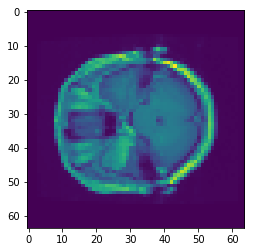

In [13]:
'''Sample Image'''
#plt.imshow(X[0])

In [14]:
'''Converting Classes to categories'''
from keras.utils import to_categorical

Y = to_categorical(Y)



Using TensorFlow backend.


In [15]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [16]:
'''Data splitting'''
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [17]:
'''Pre-Processing'''
X_train = np.array(X_train).reshape(-1,64,64, 1)
X_test = np.array(X_test).reshape(-1,64,64, 1)
X_train.shape, X_test.shape

((2286, 64, 64, 1), (763, 64, 64, 1))

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [19]:
Y_train.shape

(2286, 3)

In [20]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [21]:
'''Creating a Layered Architecture'''
from keras.models import Sequential
batch_size = 64
epochs = 50
num_classes = 3

In [22]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [23]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,1),padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# fashion_model.add(LeakyReLU(alpha=0.1))                  
# fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
#fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [25]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          18496     
__________

In [26]:
callback_early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

In [27]:
'''Training'''
fashion_train = fashion_model.fit(np.array(X_train), np.array(Y_train),epochs=epochs,batch_size=64,validation_split=0.20,callbacks=[callback_early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 1828 samples, validate on 458 samples
Epoch 1/50
1828/1828 [==============================] - 16s 9ms/step - loss: 0.9977 - acc: 0.4540 - val_loss: 0.9361 - val_acc: 0.4803
Epoch 2/50
1828/1828 [==============================] - 8s 4ms/step - loss: 0.8985 - acc: 0.6340 - val_loss: 0.7447 - val_acc: 0.6878
Epoch 3/50
1828/1828 [==============================] - 8s 4ms/step - loss: 0.6675 - acc: 0.7161 - val_loss: 0.5906 - val_acc: 0.7380
Epoch 4/50
1828/1828 [==============================] - 8s 4ms/step - loss: 0.5540 - acc: 0.7407 - val_loss: 0.5537 - val_acc: 0.7380
Epoch 5/50
1828/1828 [==============================] - 8s 4ms/step - loss: 0.5040 - acc: 0.7505 - val_loss: 0.5868 - val_acc: 0.7380
Epoch 6/50
1828/1828 [==============================] - 8s 4ms/step - loss: 0.5181 - acc: 0.7549 - val_loss: 0.5320 - val_acc: 0.7598
Epoch 7/50
1828/1828 [==============================] - 8s 4ms/step - loss: 0.4889 - acc: 0.7588 - v

In [28]:
Final= fashion_model.evaluate(X_test, Y_test)

763/763 [==============================] - 1s 1ms/step


In [29]:
print('Test loss:', Final[0])
print('Test accuracy:', Final[1])

Test loss: 0.32558747743247846
Test accuracy: 0.9017038015675576


In [30]:
predicted_classes = fashion_model.predict(X_test)

In [31]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [32]:
Y_test = np.argmax(np.round(Y_test),axis=1)

In [33]:
'''Evaluation'''

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(Y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.75      0.78       174
     Class 1       0.89      0.95      0.92       374
     Class 2       0.97      0.94      0.96       215

   micro avg       0.90      0.90      0.90       763
   macro avg       0.90      0.88      0.89       763
weighted avg       0.90      0.90      0.90       763

